# CSCI 3220: Python for Data Science and AI

### Final Exam
### Total Points: 50 + Bonus (15 Points)
### Total Time: 36 Hours
### Start Time: May 14, 10AM, End Time: May 15, 10PM


##### ***Write the code in Jupyter notebook (ipynb file) with proper comments.
##### ***Rename the file with your student ID and submit it in Moodle.
##### ***You could use Google Colab for faster training.
##### ***You are allowed to use any available libraries in python to implement the codes.
##### ***Add proper citation if you take help from a different source (not from the textbook).

In [1]:
#Name: Thien Tran
#Student ID: 2575712

import numpy as np
import pandas as pd

## 1. Implement two classification algorithms (Support Vector Machines and Decision Tree Classifier) for the wine dataset (scikit-learn toy dataset) using the scikit-learn library. The wine dataset is a multiclass classification problem. Compare the performance (accuracy) using the 10-fold cross-validation method and display the top-performing classifier. [Points: 15]

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine

wine = load_wine()
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target)

#### Support Vector Machines

In [3]:
#Citation: learned about the Support Vector Machines from scikit-learn documentation (since it wasn't in the book)
#Link: https://scikit-learn.org/stable/modules/svm.html

from sklearn import svm

#Build Model
svmModel = svm.SVC()
svmModel.fit(x_train, y_train)

y_predictions = svmModel.predict(x_test)
print("Predictions:", y_predictions)
print("True Result:", y_test)

Predictions: [2 2 0 2 1 0 0 1 1 1 2 0 2 2 0 0 2 2 2 0 1 0 1 1 2 0 0 0 2 2 1 0 0 2 1 1 1
 1 0 1 0 2 0 2 0]
True Result: [1 1 0 1 1 0 0 2 1 2 2 0 2 2 0 0 2 1 2 0 1 0 1 1 0 0 0 0 0 2 1 1 0 1 1 1 2
 1 0 1 2 1 0 2 0]


In [4]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


def runKFold(amountOfIterations):
    for i in range(amountOfIterations):
        x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target)
        kfold = KFold(n_splits=10, random_state=11, shuffle=True)
        scores = cross_val_score(estimator=svmModel, X=x_test, y=y_test, cv=kfold)
        print("10-Fold Run Mean Accuracy: %.3f" %(scores.mean()))

In [5]:
runKFold(8)

10-Fold Run Mean Accuracy: 0.590
10-Fold Run Mean Accuracy: 0.785
10-Fold Run Mean Accuracy: 0.770
10-Fold Run Mean Accuracy: 0.720
10-Fold Run Mean Accuracy: 0.775
10-Fold Run Mean Accuracy: 0.550
10-Fold Run Mean Accuracy: 0.715
10-Fold Run Mean Accuracy: 0.690


#### Decision Tree Classifier

In [6]:
#Citation: learned about the Decision Tree Classifier from scikit-learn documentation (since it wasn't in the book)
#Link: https://scikit-learn.org/stable/modules/tree.html

from sklearn import tree

#Build Model
treeModel = tree.DecisionTreeClassifier()
treeModel.fit(x_train, y_train)

y_predictions = treeModel.predict(x_test)
print("Predictions:", y_predictions)
print("True Result:", y_test)

Predictions: [1 1 0 1 1 0 0 2 1 2 2 0 2 2 0 0 2 1 2 0 1 0 2 1 0 0 0 0 1 2 1 1 0 1 1 1 2
 1 1 1 2 1 0 2 0]
True Result: [1 1 0 1 1 0 0 2 1 2 2 0 2 2 0 0 2 1 2 0 1 0 1 1 0 0 0 0 0 2 1 1 0 1 1 1 2
 1 0 1 2 1 0 2 0]


In [7]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

def runKFold(amountOfIterations):
    for i in range(amountOfIterations):
        x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target)
        kfold = KFold(n_splits=10, random_state=11, shuffle=True)
        scores = cross_val_score(estimator=treeModel, X=x_test, y=y_test, cv=kfold)
        print("10-Fold Run Mean Accuracy: %.3f" %(scores.mean()))

In [8]:
runKFold(8)

10-Fold Run Mean Accuracy: 0.895
10-Fold Run Mean Accuracy: 0.715
10-Fold Run Mean Accuracy: 0.870
10-Fold Run Mean Accuracy: 0.865
10-Fold Run Mean Accuracy: 0.790
10-Fold Run Mean Accuracy: 0.865
10-Fold Run Mean Accuracy: 0.890
10-Fold Run Mean Accuracy: 0.935


#### Comparison

Based on running 8 sets of 10-fold cross validation multiple times on randomized test data and target sets upon both the Support Vector Machines and Decision Tree Classifier models, I would say that the decision tree had a noticably higher mean accuracy compared to the support vector machines. The mean accuracies of the decision tree had a range of 71.5% to 93.5% mean accuracy while the support vector machines had 55.0% to 78.5% accuracy. Overall, the decision tree would be the better model of the two given the conditions above.

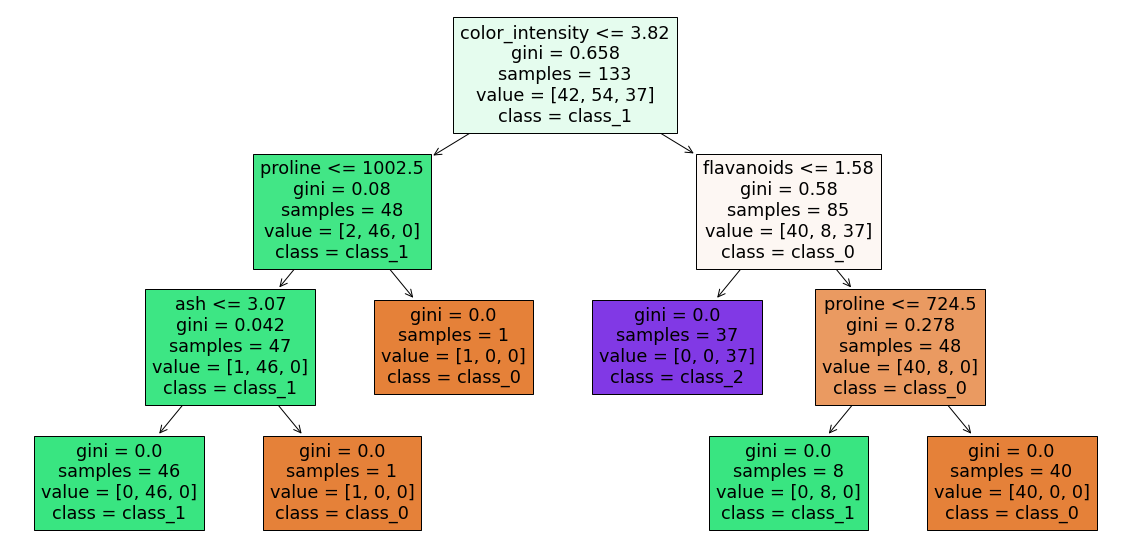

In [9]:
import matplotlib.pyplot as plt

#Citation: Learned how to plot trees from mljar
#Link: https://mljar.com/blog/visualize-decision-tree/
fig = plt.figure(figsize=(20,10))
_ = tree.plot_tree(treeModel, feature_names=wine.feature_names, class_names=wine.target_names, filled=True)

#### Bonus: Implement the Extreme Gradient Boosting (XGBoost) classifier and compare the performance with the other methods from question 1 in terms of weighted precision.


In [6]:
#Citation: learned about XGBoost and how to use it from Machine Learning Mastery
#Link: https://machinelearningmastery.com/extreme-gradient-boosting-ensemble-in-python/

from xgboost import XGBClassifier

boostModel = XGBClassifier(eval_metric='mlogloss')
boostModel.fit(x_train, y_train)

y_predictions = boostModel.predict(x_test)
print("Predictions:", y_predictions)
print("True Result:", y_test)

Predictions: [1 1 2 0 2 1 0 0 0 0 0 1 1 2 1 2 0 0 2 1 1 2 1 1 1 2 1 1 2 0 2 2 0 0 2 2 2
 1 1 0 1 0 1 0 0]
True Result: [1 1 2 1 2 1 0 0 0 0 1 1 1 2 1 2 0 0 2 1 1 1 1 1 1 2 1 1 2 0 2 2 0 0 2 1 2
 1 1 0 1 0 1 0 1]


In [9]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

def runKFold(amountOfIterations):
    for i in range(amountOfIterations):
        x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target)
        kfold = KFold(n_splits=10, random_state=11, shuffle=True)
        scores = cross_val_score(estimator=boostModel, X=x_test, y=y_test, cv=kfold)
        print("10-Fold Run Mean Accuracy: %.3f" %(scores.mean()))

In [10]:
runKFold(8)

10-Fold Run Mean Accuracy: 0.950
10-Fold Run Mean Accuracy: 0.915
10-Fold Run Mean Accuracy: 0.865
10-Fold Run Mean Accuracy: 0.845
10-Fold Run Mean Accuracy: 0.895
10-Fold Run Mean Accuracy: 0.940
10-Fold Run Mean Accuracy: 0.890
10-Fold Run Mean Accuracy: 0.980


#### Comparison

Based on running 8 sets of 10-fold cross validation multiple times on randomized test data and target sets upon the XGBoost classifier, I would say that the XGBoost classifier significantly outperformed both the Decision Tree and Support Vector Machines. The decision tree saw 71.5% to 93.5% mean accuracy while the support vector machines had 55.0% to 78.5% accuracy. These pale in comparison to the XGBoost model which saw a range of 84.5% to 98.0% accuracy.

## 2. Design and implement a recurrent neural network (LSTM) using Keras Library for the Reuters newswire classification dataset (Keras Toy Dataset). [Points: 20]

#### A. Split the dataset into train and test sets.

In [11]:
from tensorflow.keras.datasets import reuters
from tensorflow.keras.preprocessing.sequence import pad_sequences

#Citation: learned about Reuters dataset from Keras documentation.
#Link: https://keras.io/api/datasets/reuters/

number_of_words = 10000
words_per_wire = 600

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=number_of_words)


X_train = pad_sequences(X_train, maxlen=words_per_wire)
X_test = pad_sequences(X_test, maxlen=words_per_wire) 

print('x_train:', X_train.shape)
print('x_test:', X_test.shape)

x_train: (8982, 600)
x_test: (2246, 600)


C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding

#Build Model
rnn = Sequential()
rnn.add(Embedding(input_dim = number_of_words, output_dim = 128))
rnn.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))
rnn.add(Dense(46, activation='softmax'))
rnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#### B. Print the summary and architecture of the network.

In [13]:
#Model Architecture
rnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         1280000   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 46)                5934      
Total params: 1,417,518
Trainable params: 1,417,518
Non-trainable params: 0
_________________________________________________________________


#### C. Use 10% of the training data as a validation set. Plot the loss and accuracy for each epoch in the training and validation set.

In [14]:
history = rnn.fit(X_train, y_train, epochs=20, batch_size=48, validation_split=0.1)

Epoch 1/20
169/169 [==============================] - 219s 1s/step - loss: 2.7075 - accuracy: 0.3421 - val_loss: 2.0757 - val_accuracy: 0.4405
Epoch 2/20
169/169 [==============================] - 214s 1s/step - loss: 1.8622 - accuracy: 0.5002 - val_loss: 1.7679 - val_accuracy: 0.5628
Epoch 3/20
169/169 [==============================] - 220s 1s/step - loss: 1.6930 - accuracy: 0.5482 - val_loss: 1.6500 - val_accuracy: 0.5862
Epoch 4/20
169/169 [==============================] - 222s 1s/step - loss: 1.3909 - accuracy: 0.6352 - val_loss: 1.5176 - val_accuracy: 0.6085
Epoch 5/20
169/169 [==============================] - 223s 1s/step - loss: 1.1981 - accuracy: 0.6697 - val_loss: 1.4623 - val_accuracy: 0.6474
Epoch 6/20
169/169 [==============================] - 336s 2s/step - loss: 0.9663 - accuracy: 0.7498 - val_loss: 1.4253 - val_accuracy: 0.6630
Epoch 7/20
169/169 [==============================] - 244s 1s/step - loss: 0.7981 - accuracy: 0.7968 - val_loss: 1.4306 - val_accuracy: 0.6685

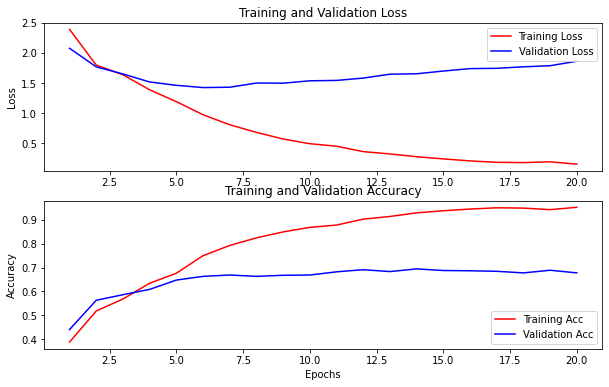

In [15]:
#Citation: Technically part of the book, but used direct plotting code from the ML_Keras_Demo since it works fine and is part of the class.
import matplotlib.pyplot as plt

history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'r', label='Training Loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

#### D. Use EarlyStopping to stop the training if there is no improvement and ModelCheckpoint to save the best model based on the validation accuracy.

In [17]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

#Rebuild Model
rnn2 = Sequential()
rnn2.add(Embedding(input_dim = number_of_words, output_dim = 128))
rnn2.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))
rnn2.add(Dense(46, activation='softmax'))
rnn2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#Stop model after one consistent local peak to avoid overfitting since validation accuracy does not significantly improve afterwards
#Patience = 2 to ensure that a single epoch validation accuracy decrease due to just noise will not stop model
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)
mc = ModelCheckpoint('model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

history = rnn2.fit(X_train, y_train, epochs=20, batch_size=48, validation_split=0.1, callbacks=[es,mc])

Epoch 1/20
169/169 [==============================] - 248s 1s/step - loss: 2.7637 - accuracy: 0.3509 - val_loss: 2.0443 - val_accuracy: 0.4805

Epoch 00001: val_accuracy improved from -inf to 0.48053, saving model to model.h5
Epoch 2/20
169/169 [==============================] - 244s 1s/step - loss: 1.9231 - accuracy: 0.4935 - val_loss: 1.7971 - val_accuracy: 0.5328

Epoch 00002: val_accuracy improved from 0.48053 to 0.53281, saving model to model.h5
Epoch 3/20
169/169 [==============================] - 242s 1s/step - loss: 1.6431 - accuracy: 0.5760 - val_loss: 1.7078 - val_accuracy: 0.5818

Epoch 00003: val_accuracy improved from 0.53281 to 0.58176, saving model to model.h5
Epoch 4/20
169/169 [==============================] - 239s 1s/step - loss: 1.5306 - accuracy: 0.6150 - val_loss: 1.5181 - val_accuracy: 0.6296

Epoch 00004: val_accuracy improved from 0.58176 to 0.62959, saving model to model.h5
Epoch 5/20
169/169 [==============================] - 242s 1s/step - loss: 1.3139 - acc

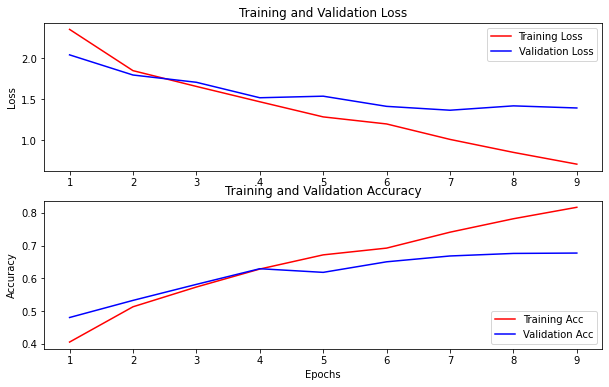

In [18]:
#Citation: Technically part of the book, but used direct plotting code from the ML_Keras_Demo since it works fine and is part of the class.
import matplotlib.pyplot as plt

history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'r', label='Training Loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

#### E. Based on the plot (question 2b), tune any two hyperparameters in the network. Explain why you want to tune these hyperparameters and how they will affect the model performance.

1. I noticed that my computer's CPU usage hovered around 45% and memory hovered around 65%. I think that increasing the batch size to 64 from 48 in the fitting function so that the training time would decrease would definitely not hurt. This also fulfills the guideline in the book which states: most models specify a power of 2.


2. I noticed that there was a point of diminishing returns when it came to validation accuracy, yet the model kept training amd potentially overfitting to the training data. I will, therefore, add the 'min_delta' hyperparameter to the EarlyStopping which will consider any improvement less than 1.12% to be not an improvement at all, which will hopefully maximize the validation accuracy while not fitting to just the training data.


3. I will increase the validation_split hyperparameter in the fit function to 0.2 because I believe that the current value of 0.1 is too small and is creating noise that may decrease or increase the accuracy in an epoch due to having a higher chance of the sample being 'lucky' - hopefully the increase in validation_split will smoothen that curve and add consitency.

In [34]:
#Rebuild Model
rnn3 = Sequential()
rnn3.add(Embedding(input_dim = number_of_words, output_dim = 128))
rnn3.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))
rnn3.add(Dense(46, activation='softmax'))
rnn3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#Citation: learned about min_delta hyperparameter from the Keras EarlyStopping documentation
#Link: https://keras.io/api/callbacks/early_stopping/
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2, min_delta=0.0112)
mc = ModelCheckpoint('model2.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

history = rnn3.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2, callbacks=[es,mc])

Epoch 1/20
113/113 [==============================] - 578s 5s/step - loss: 2.8590 - accuracy: 0.3377 - val_loss: 2.0676 - val_accuracy: 0.4769

Epoch 00001: val_accuracy improved from -inf to 0.47691, saving model to model2.h5
Epoch 2/20
113/113 [==============================] - 578s 5s/step - loss: 1.9667 - accuracy: 0.4929 - val_loss: 1.8318 - val_accuracy: 0.4802

Epoch 00002: val_accuracy improved from 0.47691 to 0.48024, saving model to model2.h5
Epoch 3/20
113/113 [==============================] - 568s 5s/step - loss: 1.7015 - accuracy: 0.5509 - val_loss: 1.6968 - val_accuracy: 0.5659

Epoch 00003: val_accuracy improved from 0.48024 to 0.56594, saving model to model2.h5
Epoch 4/20
113/113 [==============================] - 581s 5s/step - loss: 1.5688 - accuracy: 0.5893 - val_loss: 1.6327 - val_accuracy: 0.5899

Epoch 00004: val_accuracy improved from 0.56594 to 0.58987, saving model to model2.h5
Epoch 5/20
113/113 [==============================] - 579s 5s/step - loss: 1.4293 -

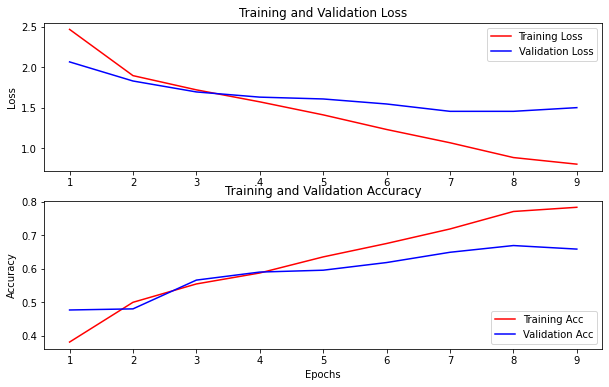

In [37]:
#Citation: Technically part of the book, but used direct plotting code from the ML_Keras_Demo since it works fine and is part of the class.
import matplotlib.pyplot as plt

history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'r', label='Training Loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

#### F. Load the best-saved model from the ModelCheckpoint callback and evaluate your model's performance in terms of accuracy for the test set.

In [21]:
from keras.models import load_model

#Citation: learned how to load saved model from TensorFlow documentation
#Link: https://www.tensorflow.org/guide/keras/save_and_serialize

loadedModel = load_model("model.h5")

In [30]:
result = loadedModel.evaluate(X_test, y_test)

71/71 [==============================] - 6s 77ms/step - loss: 1.4302 - accuracy: 0.6621


#### Bonus: Create a stacked network by combining the convolutional layer with LSTM from question 2. Is there any improvement in performance by adding the CNN layer?

In [28]:
#TODO

## 3. Write a brief description of the accuracy, precision, and recall metrics. [Points: 5]

<b>Accuracy</b> is basically the metric that represents the percentage of how many correct predictions that the model made overall relative to every observation. Accuracy, in that sense, can be thought of as how many times the model actually guessed right.

<b>Precision</b> is the metric that represents the percentage of how many correct POSITIVE predictions that the model made overall relative to the true amount of positive data points. Prediction, in that sense, can be thought of as how many positive results that the model guessed compared to how many truly positive results there are.

<b>Recall</b> is the metric that represents the percentage of how many correct POSITIVE predictions that the model made overall relative to how many times each prediction is actually truly positive. Recall, in that sense, can be thought of as how many times the model guessed positive results right.

## 4. What is an optimization algorithm? Why linear regression and neural networks use optimization algorithms (e.g., Gradient Descent)? [Points: 5]

An optimization algorithm is an algorithm used in Artificial Intelligence to incrementally adjust the slope in linear regression or neurons in neural networks to see if each 'step' increases the performance of the model as defined by the developer. These algorithms are used, in a sense, to allow the model to 'learn' from each iteration by saving the state, going backwards if the step decreases the performance of the model, and incrementing until there is no longer a performance increase otherwise.

## 5. What is the purpose of the batch in neural networks? [Points: 5]

The batch is the number of observations that is fed to the model each iteration in an epoch during training period. I actually dealt with this in question 2 of this notebook. The purpose of the batch in neural networks is to allow the developer to manually define how many samples get through in regards to certain conditions such as hardware limitations or model performance.